<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Introduction à la Recherche Opérationelle</h1><br/>M2 Statistique Science des Données (SSD)</center></td>
<td width=15%>
<a href="https://www-ljk.imag.fr/membres/Anatoli.Iouditski/" style="font-size: 16px; font-weight: bold">Anatoli Juditsky</a><br/>
<a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> </td>
</tr>
</table>

<br/><br/>
<center><a style="font-size: 30pt; font-weight: bold">TP 2 - Dantzig Selector </a></center>
<br/><br/>

# 1- Problème de régression parcimonieuse et Dantzig Selector

On considère le modèle de régression normale
$$ y=X\theta+\sigma\xi,\;\;\xi\sim \mathcal{N}(0, I_m),$$
où  $X\in \mathbb{R}^{m\times n}$ et $y\in \mathbb{R}^m$ sont les observables, et $\theta\in \mathbb{R}^n$ est le paramètre inconnu. 


L'estimateur de $\theta$ de *``Dantzig Selector''* (cf. Candes, E., Tao, T. (2007). *The Dantzig selector: Statistical estimation when $p$ is much larger than $n$*. The Annals of Statistics, 2313-2351) peut être utilisé pour estimer $\theta$ dans le cas d'un modèle surparamétré, quand la dimension $n$ de $\theta$ est supérieure a la dimension de l'observation $y$.


Dans ce cas l'estimateur ${\theta}_{DS}$  s'écrit comme une solution du probleme d'optimisation
$$\min_{\theta\in  \mathbb{R}^n} \|\theta\|_1,~~~\;\mbox{sous contrainte}\;\|X^T(X\theta-y)\|_\infty\leq \kappa\sigma,$$
où $\kappa>0$ est un *hyper-paramètre*. 


La valeur de $\kappa$, préconisée dans la literature, est $c q_{\mathcal{N}}\left(1-{\alpha\over 2m}\right)$, où $\alpha\in (0,1)$ est le niveau de risque choisi (par ex. $\alpha=.05$) et $q_\mathcal{N}(p)$ est la $p$-quantile de la normale standardisée, et $c=\max_j\|[X]_j\|_2=\max_j\sqrt{[X]_j^T[X]_j}$ est la norme maximale de colonne de la matrice $X$.

Votre objectif dans cet exercice sera d'implementer l'estimateur ${\theta}_{DS}$ en utilisant `CVXPY`.

> **Question:** Vérifier que le problème et les contraintes peuvent se formuler via des [fonctions disponibles](https://www.cvxpy.org/examples/index.html) pour CVXPY.

# 2- Un petit exemple

In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd

In [2]:
# Exemple jouet
n = 5
m = 3
sigma = 0.1

X = np.random.randn(m,n)
theta_true = np.array([1,0,0,0,5])
xi = np.random.randn(m)
y = np.dot(X,theta_true) + sigma*xi



In [3]:
X

array([[ 0.500102  , -1.26730728, -0.16287132,  0.00836784, -1.06098196],
       [ 0.58743935, -0.75971808, -0.25184377, -1.00708322,  1.34233065],
       [ 0.42416244, -2.08940719,  0.17759637, -0.06575238,  1.63053471]])

In [4]:
y

array([-4.82786249,  7.22872915,  8.69683958])

In [5]:
theta_true

array([1, 0, 0, 0, 5])

> **Question:** Trouver l'estimateur $\theta_{DS}$ à partir de $X$ et $y$ par résolution du problème d'optimisation via CVXPY avec $\kappa$ fixé à 0.2.

# 3- Fonction "Dantzig Selector"



> **Question:** Écrivez une fonction `DSelect` qui fait appel a `CVXPY` pour calculer l'estimation ${\theta}_{DS}$. 

Cette fonction doit sortir un tuple avec les elements
* `coef`, vecteur des coefficients de regression
* `resid`, vecteur $y-X{\theta}_{DS}$ de résidus
* `status`, le statut de sortie du solver

L'appel à cette fonction devra être:

`DSelect(X, y, sigma = 1, c = 1, verb = False)`

où
* `X` et `y` sont les observables
* `sigma` est une estimation de $\sigma$
* `c` est le paramètre réel tel que la valeur de $\kappa$ dans {DS} est $ \kappa=c\,q_{\mathcal{N}}\left(1-{\alpha\over 2m}\right).$

In [6]:
import scipy.stats

def DSelect(X, y, sigma = 1, c = 1, verb = False):
    

    m,n = X.shape
     
    alpha = 0.05
    kappa = c*scipy.stats.norm.ppf(1-alpha/(2*m))

    #### TODO
    theta_ds = 0
    residual = 0
    sol_status = 'Unsolved'
    ####
    
    return theta_ds,residual,sol_status

##  Test quand on connait le *vrai* theta

In [7]:
n = 5
m = 5
X = np.random.randn(m,n)
theta_true = np.random.randn(n)
sigma = 0.005

y = np.dot(X,theta_true) + sigma*np.random.randn(m)

Avec la valeur de sigma prise ci-dessus, vous devriez pouvoir appeler votre fonctions comme ci-dessous. 

In [8]:
f = DSelect(X, y, sigma=sigma)

> **Question:** Testez votre fonction sur cet exemple jouet. En particulier, comparez la valeur de `theta_ds` à la vraie valeur `theta_true`.

## Example du papier de Candes/Tao

In [9]:
import random

n = 256
m = 72
S = 8

S_set = random.sample(range(n),k=S)

X = np.random.randn(m,n)

theta_true = np.zeros(n)
theta_true[S_set] = np.random.randn(S)

sigma = 1/3.0*np.sqrt(S/m)
y = np.dot(X,theta_true) + sigma*np.random.randn(m)

In [10]:
f = DSelect(X, y, sigma= sigma)

> **Question:** Testez votre fonction sur l'exemple du papier. Comparez la valeur de `theta_ds` à la vraie valeur `theta_true`. Essayer de changer `sigma`.

### Support des solutions

La valeur cherchée `theta_true` est très parcimonieuse (elle contient beaucoup de zéros). Les seules valeurs non-null sont aux positions suivantes.

In [11]:
S_set

[30, 138, 194, 148, 141, 231, 162, 130]

In [12]:
theta_true

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.13940105,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

> **Question:** Comparez le nombre et l'emplacement des zéros dans `theta_ds` à ceux dans `theta_true`. Essayez de changer `c`.

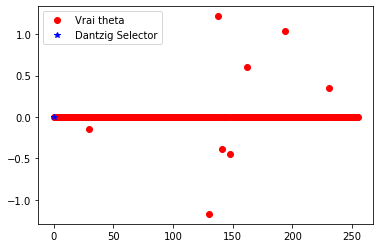

In [13]:
import matplotlib.pyplot as plt

plt.plot(theta_true,'ro',label='Vrai theta')
plt.plot(f[0],'b*',label='Dantzig Selector')
plt.legend();